# Ejercicio Regresion Lineal

 **Hacer un modelo de regression lineal desde cero.**
 
 Referencias sobre la Regresion Lineal
 
 [Regresion analysis,cost function,gradient descent](http://www.holehouse.org/mlclass/01_02_Introduction_regression_analysis_and_gr.html)
 
 [Stanford notes](http://cs229.stanford.edu/notes/cs229-notes1.pdf)
 
 [Linear Regression from a satistical perspective](http://nbviewer.jupyter.org/github/justmarkham/DAT4/blob/master/notebooks/08_linear_regression.ipynb)
 
 [Linear Models for Regression](https://amueller.github.io/COMS4995-s18/slides/aml-05-013118-linear-models-regression/#1)

In [1]:
# Importar librerias 
import numpy as np # computacion numerica
import pandas as pd # manejo de datos y analisis numerico
import matplotlib.pyplot as plt # Vizualizacion de datos
import seaborn as sns # Vizualizacion de datos

% matplotlib inline

### Importar datos 
Aqui importartaran los datos de algun dataset (Les recomiendo el de 'gapminder.csv' para comparar los resusltados con la clase pasada)

In [2]:
# importar datos
df= pd.read_csv('gapminder.csv')


### Analisis exploratorio
Aqui pueden utilizar los metodos `.describe()`,  `.info()`,   `.head()`

In [3]:
df.head()

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality,Region
0,34811059.0,2.73,0.1,3.328945,24.59620,12314.0,129.9049,75.3,29.5,Middle East & North Africa
1,19842251.0,6.43,2.0,1.474353,22.25083,7103.0,130.1247,58.3,192.0,Sub-Saharan Africa
2,40381860.0,2.24,0.5,4.785170,27.50170,14646.0,118.8915,75.5,15.4,America
3,2975029.0,1.40,0.1,1.804106,25.35542,7383.0,132.8108,72.5,20.0,Europe & Central Asia
4,21370348.0,1.96,0.1,18.016313,27.56373,41312.0,117.3755,81.5,5.2,East Asia & Pacific


In [4]:
df.describe()

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality
count,1.390000e+02,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000
mean,3.549977e+07,3.005108,1.915612,4.459874,24.623054,16638.784173,126.701914,69.602878,45.097122
std,1.095121e+08,1.615354,4.408974,6.268349,2.209368,19207.299083,4.471997,9.122189,45.724667
min,2.773150e+05,1.280000,0.060000,0.008618,20.397420,588.000000,117.375500,45.200000,2.700000
25%,3.752776e+06,1.810000,0.100000,0.496190,22.448135,2899.000000,123.232200,62.200000,8.100000
50%,9.705130e+06,2.410000,0.400000,2.223796,25.156990,9938.000000,126.519600,72.000000,24.000000
75%,2.791973e+07,4.095000,1.300000,6.589156,26.497575,23278.500000,130.275900,76.850000,74.200000
max,1.197070e+09,7.590000,25.900000,48.702062,28.456980,126076.000000,135.492000,82.600000,192.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139 entries, 0 to 138
Data columns (total 10 columns):
population         139 non-null float64
fertility          139 non-null float64
HIV                139 non-null float64
CO2                139 non-null float64
BMI_male           139 non-null float64
GDP                139 non-null float64
BMI_female         139 non-null float64
life               139 non-null float64
child_mortality    139 non-null float64
Region             139 non-null object
dtypes: float64(9), object(1)
memory usage: 10.9+ KB


### Vizualizacion de los datos 
Esto te permitira ver de forma rapida la correlacion entre variables.

Pueden hacer un mapa de calor ('Heatmap' que viene en la libreria seaborn), un histograma (distribucion de la variable), boxplot plot,swarm plot. Tambien pueden basarse en el notebook de *introduction to data vizualization* que les subi 

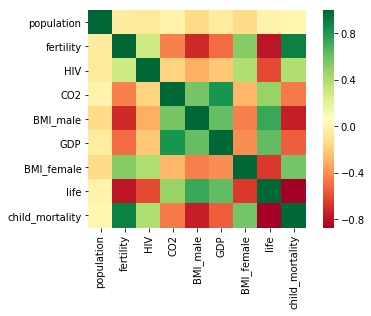

In [6]:
# Heat map
corr=df.corr()
sns.heatmap(df.corr(), square=True, cmap='RdYlGn')

### Elegir los datos de entrenamiento entradas (X_train) y salidas (y_train)
Traten de elegir aquellas que contengas mayor correlacion, pueden utilizar la correlacion de pearson para saberlo

In [7]:
X_train= df['fertility']
y_train= df['life'] 

print("la forma de X es : ", )
print("la forma de y es : ", )


# Utilizen el metodo .values.reshape(-1,1) para cambiar la forma de los vectores 

X_train=X_train.values.reshape(-1,1)
y_train=y_train.values.reshape(-1,1) 

print("la forma nueva de X es : ", X_train)
print("la forma nueva de y es : ", y_train)


la forma de X es :  (139,)
la forma de y es :  (139,)
la forma nueva de X es :  (139, 1)
la forma nueva de y es :  (139, 1)


### Modelo de regresion lineal 

**Regla general**

$$y=W_{1}*x_{1} + W_{2}*x_{2}+ ...W_{n}*x_{n}  + b_0 $$

Modelo a implementar con una sola variable
        
$$y=W_{1}*x_{1} +  b_0 $$
   
* 'W1' son los parametros o 'weights' 
* 'bo' ordenada en el origen o 'bias'
* 'y' es tu modelo de regresion lineal

*  **θ es un vector de parametros y X en este caso tambien es un vector**

Por conveccion en modelos de regresion lineal se inicializan la variables(θ) a cero 

In [8]:
## Primero inicializa los parametros a cero para poder rellenarlos a futuro, ya que son valores que iran cambiando respecto al num. de iteraciones

# num ejemplos
m=X_train.shape[0]
# vector de unos
ones=np.ones((m,1))

# Unir dos columnas para obetener una matriz de entrenamiento
X=np.column_stack((ones, X_train))
print(X.shape)


(139, 2)


In [ ]:
X=X.fillna(method='ffill') # Elimina NaN


### Funcion de Error

Esta funcion te premitira determinar el error de la funcion mediante RMS

* Funcion no vectorizada 
$$ Error=\frac{1}{2m}\sum_{k=1}^n (XW-ytrain)^2$$


* Funcion vectorizada para multiples variables de regresion 

$$ Error=\frac{1}{2m}\sum_{k=1}^n(XW-y)^T  (XW-y)$$


* Una forma de sacar el cuadrado de un vector de forma vectorizada es con la siguiente operacion


$$ X^2 = X^TX  $$ 

* 'm' es el numero de ejemplos o datos de entrenamiento.
* Se aplica producto punto en vez del producto de elemento por elemento


In [9]:
def funcion_de_error(X,y,theta):
    
    """Funcion que calcula el error de un modelo
    Arg:
    X: Datos de entrenamiento
    y: labels, target
    theta:parametros
    
    Return:
    error 
    """
    X.fillna(value=0)
    
    # Tu codigo
    error=
    
  
    return error 


In [10]:
# Inicializar los parametros theta
theta=np.array([[2],[1]]) # inicializar a como tu quieras
theta=np.random.randn(2,1) #inicializar aleatoriamente
theta=np.zeros((2,1)) # inicializar a cero
theta.shape

(2, 1)

In [11]:
error=funcion_de_error(X,y_train,theta)
print('the error is: ', error)

the error is:  [[2140.55136942]]


### Gradiente Descenciente 
Este es un algoritmo de optimizacion que se encarga de encon trar el minimo global de la funcion osea el punto donde la funcion produce el minimo error

Formula general del Gradiente descentiente: 

$$W := W_i-  a*\frac{\partial error}{\partial W_i}$$



Formula vectorizada para multiples variables: 

$$W:=W -  \frac{a}{m}X^T(XW-y) $$


* *W es el vector gradiente*

* **alpha** es el learning rate

* *i* es el numero de ejemplos

In [12]:
def gradiente(X,y,theta,alpha,num_iteraciones):
    
  
    """Esta funcion retorna un vector gradiente con los parametros que tienen el minimo error"""
  
    # numero de ejemplos
    m=len(y)
    
    #inicializar error
    
    error=[]
    
    # Tu codigo!
    
    for i in range(num_iteraciones):
        

        # theta o gradiente    
        theta=
    
        # funcion de error
        
    
    return [theta, error]

In [34]:
# definir  parametros e hyperparametros
alpha =0.01 # learning rate
num_iter=10000

theta1=np.zeros((2,1)) #inicializar parametros

In [35]:
theta,error= gradiente(X,y_train,theta1,alpha,num_iter)

### Visualizar la grafica original y el modelo con los nuevos parametros 

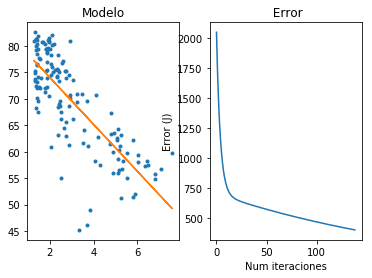

In [38]:
plt.subplot(1,2,1)
plt.plot(X_train,y_train,marker='.',linestyle='none') # datos de estranamiento 
plt.plot(X_train,X@theta) # Modelo X@Theta 
plt.title('Modelo')

plt.subplot(1,2,2)
cost_x=np.arange(0,139)
_=plt.plot(cost_x,error[0:139])
_=plt.xlabel("Num iteraciones")
_=plt.ylabel("Error (J)")
plt.title(' Error')
plt.show()

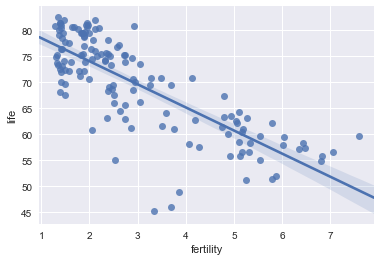

In [ ]:
# Grafica de comprobacion
sns.regplot(x='fertility',y='life',data=df )

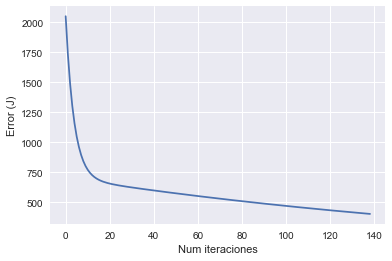

In [ ]:
# grafica de error
cost_x=np.arange(0,139)
_=plt.plot(cost_x,error[0:139])
_=plt.xlabel("Num iteraciones")
_=plt.ylabel("Error (J)")


In [49]:
theta

array([[82.95721355],
       [-4.44387897]])

### Normal Equation

Es una forma de obtener los parametros de la regresion lineal sin necesidad de hyperparametros ni gradiente descendiente 

* Funciona muy bien con pequeños datasets ejemplos menores a  1000

Formula:
$$W=(X^T  X)^{-1} X^T y  $$

In [ ]:
def normalEquation(x,y):
    # Tu codigo
    
    return theta

In [ ]:
# Calcula el Error

In [ ]:
# Visualiza la Regression

In [ ]:
# Visualiza el Error o Costo 

### Evaluar el RMSE del modelo
Desarrollar una funcion que te permita saber la RMSE del modelo

In [ ]:
def rmse(pred,yreal):
  
  # Tu codigo
  
  
    return exactitud

### Normalizacion guasiana de las caracteristicas

Esta se utiliza para que tu modelo converga mas rapido al minimo global.

Ahora implementa el modelo normalizando la entrada antes de entrenarlo y ve los resultados.

In [ ]:
def featureNormalization(x):
    """ Normalizar las caracteristicas para que pueda converger mas rapido con el Gradient Descent """
    
    # Mean  
    mu =
    
    # Standar deviation
    std =

    # inicializar la matriz 
    x_normalizada=
    
    # number of columns or variables
    r =
    
    # Normalize
    
        
    return  [x_normalizada, mu, sigma] 